## CAISO April Net Load Trends

We will be using the gridstatusio API client for data fetching, and Plotly for data visualization. You can register for a Grid Status api key here: https://www.gridstatus.io/api

In [1]:
import pandas as pd
import plotly.graph_objects as go

import gridstatusio

gridstatusio.__version__

There is a newer version of the gridstatusio library available (0.7.0). You are using version 0.6.5.

We recommend upgrading via the 'pip install --upgrade gridstatusio' command.

See the changelog here: https://github.com/gridstatus/gridstatusio/blob/main/CHANGELOG.md


'0.6.5'

## Initialize the gridstatusio client

We instantiate the GridStatusClient, which we will use to fetch our data.

In [2]:
# make sure to set up API Key in environment variable
# or pass it in as a string
client = gridstatusio.GridStatusClient()

GridStatusClient(host=https://api.gridstatus.io/v1)

## Get data

Fetch data using the GridStatusClient. We will get the 'caiso_standardized_5_min' dataset from the beginning of the data to the most recent data.

We are setting a `limit` value for our queries to prevent them from returning too many rows. Our `limit` is relatively high in this notebook and if you are on a Grid Status free plan, you will want to set a much lower `limit` to avoid quickly using your monthly row limit.

In [3]:
QUERY_LIMIT = 750_000

750000

In [4]:
import warnings

warnings.filterwarnings("ignore")

df = client.get_dataset(
    dataset="caiso_standardized_5_min",
    start=None,  # start from beginning of data
    end=None,  # end at most recent data
    tz="US/Pacific",  # return time stamps in Pacific time
)

Fetching Page 1...Done in 4.48 seconds. 
Fetching Page 2...Done in 5.03 seconds. Total time: 9.51s. Avg per page: 4.76s
Fetching Page 3...Done in 4.86 seconds. Total time: 14.37s. Avg per page: 4.79s
Fetching Page 4...Done in 4.47 seconds. Total time: 18.84s. Avg per page: 4.71s
Fetching Page 5...Done in 4.14 seconds. Total time: 22.98s. Avg per page: 4.6s
Fetching Page 6...Done in 4.51 seconds. Total time: 27.49s. Avg per page: 4.58s
Fetching Page 7...Done in 3.46 seconds. Total time: 30.96s. Avg per page: 4.42s

Total number of rows: 672341


interval_start_local        interval_end_local    net_load  \
0      2018-04-10 00:05:00-07:00 2018-04-10 00:10:00-07:00 21_953.0000   
1      2018-04-10 00:10:00-07:00 2018-04-10 00:15:00-07:00 21_865.0000   
2      2018-04-10 00:15:00-07:00 2018-04-10 00:20:00-07:00 21_687.0000   
3      2018-04-10 00:20:00-07:00 2018-04-10 00:25:00-07:00 21_579.0000   
4      2018-04-10 00:25:00-07:00 2018-04-10 00:30:00-07:00 21_432.0000   
...                          ...                       ...         ...   
672336 2024-08-30 12:05:00-07:00 2024-08-30 12:10:00-07:00         NaN   
672337 2024-08-30 12:10:00-07:00 2024-08-30 12:15:00-07:00         NaN   
672338 2024-08-30 12:15:00-07:00 2024-08-30 12:20:00-07:00         NaN   
672339 2024-08-30 12:20:00-07:00 2024-08-30 12:25:00-07:00         NaN   
672340 2024-08-30 12:25:00-07:00 2024-08-30 12:30:00-07:00         NaN   

        renewables  renewables_to_load_ratio primary_power_source   load.load  \
0       5_430.0000                    0.2427          natural_gas 22_371.0000   
1       5_512.0000                    0.2468          natural_gas 22_330.0000   
2       5_449.0000                    0.2468          natural_gas 22_082.0000   
3       5_434.0000                    0.2472          natural_gas 21_978.0000   
4       5_413.0000                    0.2478          natural_gas 21_844.0000   
...            ...                       ...                  ...         ...   
672336         NaN                       NaN                 None         NaN   
672337         NaN                       NaN                 None         NaN   
672338         NaN                       NaN                 None         NaN   
672339         NaN                       NaN                 None         NaN   
672340         NaN                       NaN                 None         NaN   

       load_forecast.publish_time_local  load_forecast.load_forecast  \
0             2018-04-08 09:10:00-07:00                  22_362.7808   
1             2018-04-08 09:10:00-07:00                  22_260.1467   
2             2018-04-08 09:10:00-07:00                  22_157.5125   
3             2018-04-08 09:10:00-07:00                  22_054.8783   
4             2018-04-08 09:10:00-07:00                  21_952.2442   
...                                 ...                          ...   
672336        2024-08-29 09:10:00-07:00                  25_912.8700   
672337        2024-08-29 09:10:00-07:00                  25_912.8700   
672338        2024-08-29 09:10:00-07:00                  25_912.8700   
672339        2024-08-29 09:10:00-07:00                  25_912.8700   
672340        2024-08-29 09:10:00-07:00                  25_912.8700   

        fuel_mix.solar  fuel_mix.wind  fuel_mix.geothermal  fuel_mix.biomass  \
0               0.0000       418.0000             689.0000          296.0000   
1               0.0000       465.0000             688.0000          297.0000   
2               0.0000       395.0000             687.0000          296.0000   
3               0.0000       399.0000             686.0000          295.0000   
4               0.0000       412.0000             687.0000          293.0000   
...                ...            ...                  ...               ...   
672336             NaN            NaN                  NaN               NaN   
672337             NaN            NaN                  NaN               NaN   
672338             NaN            NaN                  NaN               NaN   
672339             NaN            NaN                  NaN               NaN   
672340             NaN            NaN                  NaN               NaN   

        fuel_mix.biogas  fuel_mix.small_hydro  fuel_mix.coal  \
0              232.0000              370.0000        -6.0000   
1              232.0000              366.0000        -6.0000   
2              232.0000              369.0000        -6.0000   
3              233.0000              367.0000        -6.0000   
4   

In [5]:
import warnings

warnings.filterwarnings("ignore")

df = client.get_dataset(
    dataset="caiso_standardized_5_min",
    start=None,  # start from beginning of data
    end=None,  # end at most recent data
    tz="US/Pacific",  # return time stamps in Pacific time
    limit=QUERY_LIMIT,
)

Fetching Page 1...Done in 4.5 seconds. 
Total rows: 100,000/750,000 (13.33% of limit)
Fetching Page 2...Done in 4.8 seconds. Total time: 9.3s. Avg per page: 4.65s
Total rows: 200,000/750,000 (26.67% of limit)
Fetching Page 3...Done in 4.55 seconds. Total time: 13.85s. Avg per page: 4.62s
Total rows: 300,000/750,000 (40.0% of limit)
Fetching Page 4...Done in 4.15 seconds. Total time: 18.0s. Avg per page: 4.5s
Total rows: 400,000/750,000 (53.33% of limit)
Fetching Page 5...Done in 4.54 seconds. Total time: 22.54s. Avg per page: 4.51s
Total rows: 500,000/750,000 (66.67% of limit)
Fetching Page 6...Done in 5.48 seconds. Total time: 28.01s. Avg per page: 4.67s
Total rows: 600,000/750,000 (80.0% of limit)
Fetching Page 7...Done in 3.72 seconds. Total time: 31.73s. Avg per page: 4.53s
Total rows: 672,341/750,000 (89.65% of limit)

Total number of rows: 672341


interval_start_local        interval_end_local    net_load  \
0      2018-04-10 00:05:00-07:00 2018-04-10 00:10:00-07:00 21_953.0000   
1      2018-04-10 00:10:00-07:00 2018-04-10 00:15:00-07:00 21_865.0000   
2      2018-04-10 00:15:00-07:00 2018-04-10 00:20:00-07:00 21_687.0000   
3      2018-04-10 00:20:00-07:00 2018-04-10 00:25:00-07:00 21_579.0000   
4      2018-04-10 00:25:00-07:00 2018-04-10 00:30:00-07:00 21_432.0000   
...                          ...                       ...         ...   
672336 2024-08-30 12:05:00-07:00 2024-08-30 12:10:00-07:00         NaN   
672337 2024-08-30 12:10:00-07:00 2024-08-30 12:15:00-07:00         NaN   
672338 2024-08-30 12:15:00-07:00 2024-08-30 12:20:00-07:00         NaN   
672339 2024-08-30 12:20:00-07:00 2024-08-30 12:25:00-07:00         NaN   
672340 2024-08-30 12:25:00-07:00 2024-08-30 12:30:00-07:00         NaN   

        renewables  renewables_to_load_ratio primary_power_source   load.load  \
0       5_430.0000                    0.2427          natural_gas 22_371.0000   
1       5_512.0000                    0.2468          natural_gas 22_330.0000   
2       5_449.0000                    0.2468          natural_gas 22_082.0000   
3       5_434.0000                    0.2472          natural_gas 21_978.0000   
4       5_413.0000                    0.2478          natural_gas 21_844.0000   
...            ...                       ...                  ...         ...   
672336         NaN                       NaN                 None         NaN   
672337         NaN                       NaN                 None         NaN   
672338         NaN                       NaN                 None         NaN   
672339         NaN                       NaN                 None         NaN   
672340         NaN                       NaN                 None         NaN   

       load_forecast.publish_time_local  load_forecast.load_forecast  \
0             2018-04-08 09:10:00-07:00                  22_362.7808   
1             2018-04-08 09:10:00-07:00                  22_260.1467   
2             2018-04-08 09:10:00-07:00                  22_157.5125   
3             2018-04-08 09:10:00-07:00                  22_054.8783   
4             2018-04-08 09:10:00-07:00                  21_952.2442   
...                                 ...                          ...   
672336        2024-08-29 09:10:00-07:00                  25_912.8700   
672337        2024-08-29 09:10:00-07:00                  25_912.8700   
672338        2024-08-29 09:10:00-07:00                  25_912.8700   
672339        2024-08-29 09:10:00-07:00                  25_912.8700   
672340        2024-08-29 09:10:00-07:00                  25_912.8700   

        fuel_mix.solar  fuel_mix.wind  fuel_mix.geothermal  fuel_mix.biomass  \
0               0.0000       418.0000             689.0000          296.0000   
1               0.0000       465.0000             688.0000          297.0000   
2               0.0000       395.0000             687.0000          296.0000   
3               0.0000       399.0000             686.0000          295.0000   
4               0.0000       412.0000             687.0000          293.0000   
...                ...            ...                  ...               ...   
672336             NaN            NaN                  NaN               NaN   
672337             NaN            NaN                  NaN               NaN   
672338             NaN            NaN                  NaN               NaN   
672339             NaN            NaN                  NaN               NaN   
672340             NaN            NaN                  NaN               NaN   

        fuel_mix.biogas  fuel_mix.small_hydro  fuel_mix.coal  \
0              232.0000              370.0000        -6.0000   
1              232.0000              366.0000        -6.0000   
2              232.0000              369.0000        -6.0000   
3              233.0000              367.0000        -6.0000   
4   

In [6]:
df

interval_start_local        interval_end_local    net_load  \
0      2018-04-10 00:05:00-07:00 2018-04-10 00:10:00-07:00 21_953.0000   
1      2018-04-10 00:10:00-07:00 2018-04-10 00:15:00-07:00 21_865.0000   
2      2018-04-10 00:15:00-07:00 2018-04-10 00:20:00-07:00 21_687.0000   
3      2018-04-10 00:20:00-07:00 2018-04-10 00:25:00-07:00 21_579.0000   
4      2018-04-10 00:25:00-07:00 2018-04-10 00:30:00-07:00 21_432.0000   
...                          ...                       ...         ...   
672336 2024-08-30 12:05:00-07:00 2024-08-30 12:10:00-07:00         NaN   
672337 2024-08-30 12:10:00-07:00 2024-08-30 12:15:00-07:00         NaN   
672338 2024-08-30 12:15:00-07:00 2024-08-30 12:20:00-07:00         NaN   
672339 2024-08-30 12:20:00-07:00 2024-08-30 12:25:00-07:00         NaN   
672340 2024-08-30 12:25:00-07:00 2024-08-30 12:30:00-07:00         NaN   

        renewables  renewables_to_load_ratio primary_power_source   load.load  \
0       5_430.0000                    0.2427          natural_gas 22_371.0000   
1       5_512.0000                    0.2468          natural_gas 22_330.0000   
2       5_449.0000                    0.2468          natural_gas 22_082.0000   
3       5_434.0000                    0.2472          natural_gas 21_978.0000   
4       5_413.0000                    0.2478          natural_gas 21_844.0000   
...            ...                       ...                  ...         ...   
672336         NaN                       NaN                 None         NaN   
672337         NaN                       NaN                 None         NaN   
672338         NaN                       NaN                 None         NaN   
672339         NaN                       NaN                 None         NaN   
672340         NaN                       NaN                 None         NaN   

       load_forecast.publish_time_local  load_forecast.load_forecast  \
0             2018-04-08 09:10:00-07:00                  22_362.7808   
1             2018-04-08 09:10:00-07:00                  22_260.1467   
2             2018-04-08 09:10:00-07:00                  22_157.5125   
3             2018-04-08 09:10:00-07:00                  22_054.8783   
4             2018-04-08 09:10:00-07:00                  21_952.2442   
...                                 ...                          ...   
672336        2024-08-29 09:10:00-07:00                  25_912.8700   
672337        2024-08-29 09:10:00-07:00                  25_912.8700   
672338        2024-08-29 09:10:00-07:00                  25_912.8700   
672339        2024-08-29 09:10:00-07:00                  25_912.8700   
672340        2024-08-29 09:10:00-07:00                  25_912.8700   

        fuel_mix.solar  fuel_mix.wind  fuel_mix.geothermal  fuel_mix.biomass  \
0               0.0000       418.0000             689.0000          296.0000   
1               0.0000       465.0000             688.0000          297.0000   
2               0.0000       395.0000             687.0000          296.0000   
3               0.0000       399.0000             686.0000          295.0000   
4               0.0000       412.0000             687.0000          293.0000   
...                ...            ...                  ...               ...   
672336             NaN            NaN                  NaN               NaN   
672337             NaN            NaN                  NaN               NaN   
672338             NaN            NaN                  NaN               NaN   
672339             NaN            NaN                  NaN               NaN   
672340             NaN            NaN                  NaN               NaN   

        fuel_mix.biogas  fuel_mix.small_hydro  fuel_mix.coal  \
0              232.0000              370.0000        -6.0000   
1              232.0000              366.0000        -6.0000   
2              232.0000              369.0000        -6.0000   
3              233.0000              367.0000        -6.0000   
4   

## Preprocessing data

Extract the data for the month of April and create additional columns for year and time. Then, calculate the average net load for each year and time combination.

In [7]:
apr_data = df[df["interval_start_local"].dt.month == 4].copy()

apr_data["year"] = apr_data["interval_start_local"].dt.year
apr_data["hh:mm"] = apr_data["interval_start_local"].dt.strftime("%H:%M")

net_load_apr_avg = (
    apr_data.groupby(["year", "hh:mm"])[["net_load"]].mean().reset_index()
)

# append 24:00 so tick shows up on plot
net_load_apr_avg = pd.concat(
    [net_load_apr_avg, pd.DataFrame({"year": 2023, "hh:mm": ["24:00"]})]
)

net_load_apr_avg

year  hh:mm    net_load
0     2018  00:00 18_838.1000
1     2018  00:05 18_886.3810
2     2018  00:10 18_831.4762
3     2018  00:15 18_728.5714
4     2018  00:20 18_629.1905
...    ...    ...         ...
2012  2024  23:40 17_616.8333
2013  2024  23:45 17_526.2000
2014  2024  23:50 17_440.9333
2015  2024  23:55 17_339.0667
0     2023  24:00         NaN

[2017 rows x 3 columns]

## Preprocessing data for minimum net load day in 2023

Extract the data for 2023 and find the day with the minimum net load.

In [8]:
apr_2023 = apr_data[apr_data["year"] == 2023]

# get time min load occurred in 2033
min_net_load_time = apr_2023.loc[apr_2023["net_load"].idxmin(), "interval_start_local"]

# select data for only that day
min_net_load_day_2023 = apr_2023[
    apr_2023["interval_start_local"].dt.date == min_net_load_time.date()
]
min_net_load_day_2023[["interval_start_local", "hh:mm", "net_load"]]

interval_start_local  hh:mm    net_load
529631 2023-04-23 00:00:00-07:00  00:00 17_487.0000
529632 2023-04-23 00:05:00-07:00  00:05 17_590.0000
529633 2023-04-23 00:10:00-07:00  00:10 17_558.0000
529634 2023-04-23 00:15:00-07:00  00:15 17_402.0000
529635 2023-04-23 00:20:00-07:00  00:20 17_285.0000
...                          ...    ...         ...
529914 2023-04-23 23:35:00-07:00  23:35 16_612.0000
529915 2023-04-23 23:40:00-07:00  23:40 16_423.0000
529916 2023-04-23 23:45:00-07:00  23:45 16_266.0000
529917 2023-04-23 23:50:00-07:00  23:50 16_137.0000
529918 2023-04-23 23:55:00-07:00  23:55 16_055.0000

[288 rows x 3 columns]

## Plotting data with Plotly

Here we create an interactive plot using Plotly. We plot net load over time for each year, with different colors for different years, and also add a special line for the day in 2023 with the minimum net load.

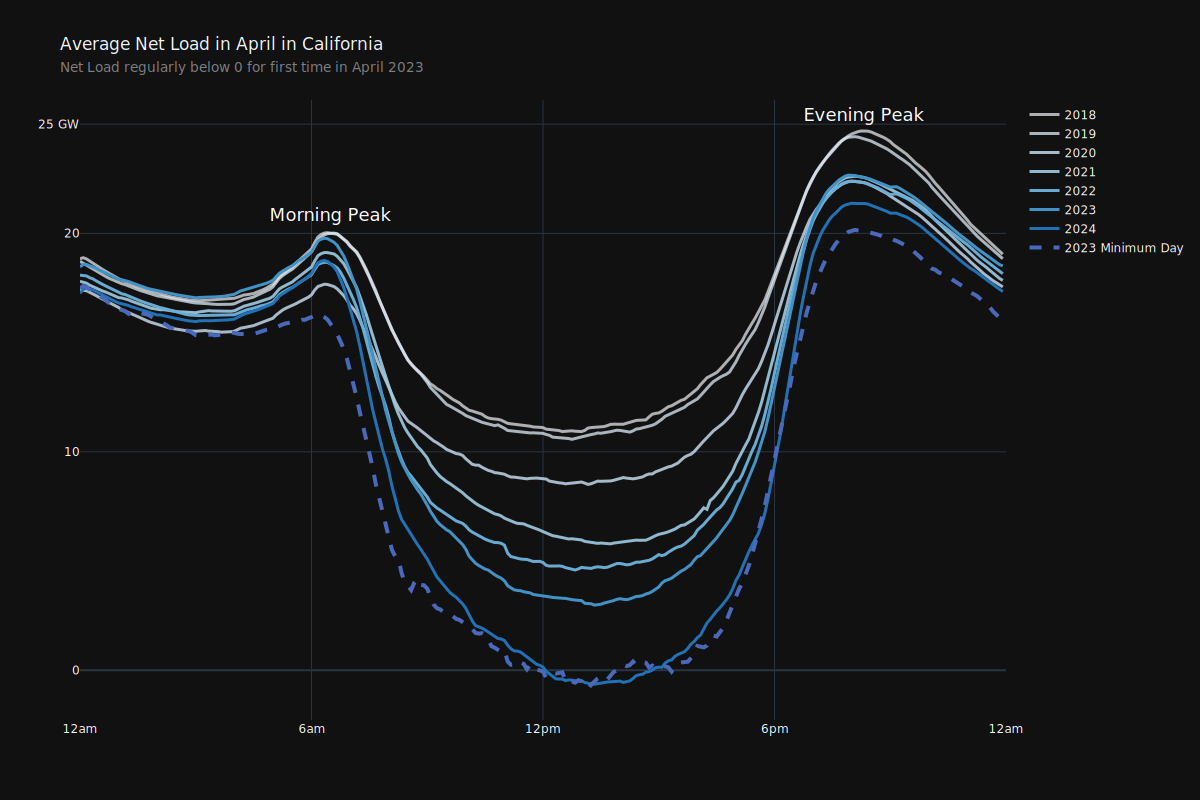

In [9]:
# Import plotly libraries
import plotly.express as px

# Define figure
fig = go.Figure()

# Get unique years and define color gradient
unique_years = net_load_apr_avg["year"].unique()
blues = px.colors.sequential.Blues[: len(unique_years)]

# Add line traces for net_load per year
for year, color in zip(unique_years, blues):
    # Filter net load data for the current year
    year_data = net_load_apr_avg[net_load_apr_avg["year"] == year]

    fig.add_trace(
        go.Scatter(
            x=year_data["hh:mm"],
            y=year_data["net_load"] / 1000,
            mode="lines",
            name=str(year),
            line=dict(color=color, width=3),
            opacity=min(0.6 + (year - 2017) * 0.075, 1),
        )
    )

# Add trace for minimum net_load_day in 2023
fig.add_trace(
    go.Scatter(
        x=min_net_load_day_2023["hh:mm"],
        y=min_net_load_day_2023["net_load"] / 1000,
        mode="lines",
        name="2023 Minimum Day",
        line=dict(color="#4a69bb", width=4, dash="dash"),
        opacity=1,
    )
)

# Define axis tick values
x_tick_values = ["00:00", "06:00", "12:00", "18:00", "24:00"]
y_tick_values = [0, 10, 20, 25]

# Update layout with title, subtitle, and custom axis tick labels
fig.update_layout(
    title="Average Net Load in April in California<br><span style='font-size:0.8em;color:gray'>Net Load regularly below 0 for first time in April 2023 </span>",  # noqa
    xaxis=dict(
        tickmode="array",
        tickvals=x_tick_values,
        ticktext=["12am", "6am", "12pm", "6pm", "12am"],
    ),
    yaxis=dict(tickmode="array", tickvals=y_tick_values, ticktext=[0, 10, 20, "25 GW"]),
    template="plotly_dark",
)

# Define annotations
annotations = [
    {
        "x": "06:30",
        "text": "Morning Peak",
        "y_shift": 35,
        "time": "06:00",
        #  font size
        "font_size": 20,
    },
    {"x": "20:20", "text": "Evening Peak", "y_shift": 160, "time": "18:00"},
]

# Add annotations for morning and evening peaks
for annotation in annotations:
    fig.add_annotation(
        x=annotation["x"],
        y=net_load_apr_avg[net_load_apr_avg["hh:mm"] == annotation["time"]][
            "net_load"
        ].max()
        / 1000,
        text=annotation["text"],
        showarrow=False,
        yshift=annotation["y_shift"],
        font=dict(color="white", size=18),
    )

# interactive
# fig.show()
# Display the figure as svg
fig.show("svg", width=1200, height=800)

## Conclusion

We have now plotted the average net load in April in California over several years, highlighting the year 2023 which was the first time the net load regularly went below zero. This information is invaluable for understanding changes in energy consumption and generation patterns over time.